In [344]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'e', 'cov', 'zeros']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [345]:
df = pd.read_csv(r'C:\Users\samas\Downloads\NYU Spring 2021 - Assignment 8 data.csv')

In [346]:
df['CPI_lag'] = df.CPI.shift(-1)

In [347]:
df['S&P500_infl_adj'] = df.CPI_lag/df.CPI * df['S&P500']

In [348]:
df['S&P500_infl_adj'] = df['S&P500_infl_adj'].shift(1)

In [349]:
df

,Year,Month,CPI,S&P500,Earnings,Dividends,10Y treasury,Gold,CPI_lag,S&P500_infl_adj
0,1871,1,12.464,4.440000,0.0333,0.0217,0.053200,20.63,12.845,NaN
1,1871,2,12.845,4.500000,0.0333,0.0217,0.053233,20.77,13.035,4.575722
2,1871,3,13.035,4.610000,0.0333,0.0217,0.053267,21.10,12.559,4.566563
3,1871,4,12.559,4.740000,0.0333,0.0217,0.053300,21.28,12.274,4.441656
4,1871,5,12.274,4.860000,0.0333,0.0217,0.053333,21.17,12.083,4.632436
...,...,...,...,...,...,...,...,...,...,...
1797,2020,10,260.388,3418.701364,7.9173,4.8883,0.007900,1902.53,260.229,3366.913147
1798,2020,11,260.229,3548.992500,7.7694,4.8724,0.008700,1869.50,260.474,3416.613812
1799,2020,12,260.474,3695.310000,7.5617,4.8566,0.009300,1853.80,261.582,3552.333800
1800,2021,1,261.582,3793.748421,7.3594,4.8408,0.010800,1869.68,262.136,3711.029049


In [350]:
df['S&P500_returns'] = ((df['S&P500'] + df.Dividends)/df['S&P500_infl_adj']) - 1

In [351]:
df['Gold_adj_infl'] = df.CPI_lag/df.CPI * df.Gold

In [352]:
df['Gold_adj_infl'] = df.Gold_adj_infl.shift(1)

In [353]:
df['Gold_returns'] = df['Gold']/df['Gold_adj_infl'] - 1

In [354]:
df['yield_lag'] = df['10Y treasury'].shift(1)

In [355]:
df['c/r'] = df['yield_lag']/df['10Y treasury']

In [356]:
df['c/r+'] = (1-df['c/r'])*(1+(df['10Y treasury']/2))**(-20) + df['yield_lag']/12

In [357]:
df['bond_price'] = df['c/r'] + df['c/r+']

In [358]:
df['infl'] = df['CPI_lag']/df['CPI']

In [359]:
df['infl'] = df['infl'].shift(1)


In [360]:
df['bond_returns'] = df['bond_price']/df['infl'] - 1

In [361]:
rets = df[['Year','Month','S&P500_returns','Gold_returns','bond_returns']]

In [362]:
rets

,Year,Month,S&P500_returns,Gold_returns,bond_returns
0,1871,1,NaN,NaN,NaN
1,1871,2,-0.011806,-0.023076,-0.025605
2,1871,3,0.014264,0.001081,-0.010462
3,1871,4,0.072055,0.046755,0.042245
4,1871,5,0.053808,0.017931,0.027506
...,...,...,...,...,...
1797,2020,10,0.016833,-0.011302,-0.010401
1798,2020,11,0.040172,-0.016761,-0.006381
1799,2020,12,0.041616,-0.009331,-0.005928
1800,2021,1,0.023595,0.004294,-0.017586


## Q1

In [363]:
mask = (rets.Year <= 1999)

In [364]:
rets_99 = rets.loc[mask]

In [365]:
cov = rets_99[['S&P500_returns','Gold_returns', 'bond_returns' ]].cov()

In [366]:
cov

,S&P500_returns,Gold_returns,bond_returns
S&P500_returns,0.001721,0.000102,0.000134
Gold_returns,0.000102,0.001167,0.000101
bond_returns,0.000134,0.000101,0.000258


In [367]:
mean_excess_rets = np.array(rets_99.mean())

In [368]:
mean_excess_rets = mean_excess_rets[2:]

In [369]:
mean_excess_rets

array([0.00682765, 0.00056208, 0.00230286])

In [370]:
sharpe_weights = mean_excess_rets.dot(np.linalg.inv(cov))

In [371]:
sharpe_weights = sharpe_weights/sum(sharpe_weights)

## Optimal Sharpe Portfolio Weights

In [372]:
sharpe_weights

array([ 0.33194785, -0.04392734,  0.71197948])

In [373]:
rets_99['optimal_pf_rets'] = (0.33194785*rets_99['S&P500_returns'])+(-0.04392734*rets_99['Gold_returns']) + ( 0.71197948*rets_99['bond_returns'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [374]:
rets_99.head()

,Year,Month,S&P500_returns,Gold_returns,bond_returns,optimal_pf_rets
0,1871,1,NaN,NaN,NaN,NaN
1,1871,2,-0.011806,-0.023076,-0.025605,-0.021136
2,1871,3,0.014264,0.001081,-0.010462,-0.002761
3,1871,4,0.072055,0.046755,0.042245,0.051943
4,1871,5,0.053808,0.017931,0.027506,0.036657


## Q2

In [375]:
means_monthly = rets_99[['S&P500_returns','Gold_returns','bond_returns','optimal_pf_rets']].mean()
means_monthly

S&P500_returns     0.006828
Gold_returns       0.000562
bond_returns       0.002303
optimal_pf_rets    0.003881
dtype: float64

In [376]:
std_monthly = rets_99[['S&P500_returns','Gold_returns','bond_returns','optimal_pf_rets']].std()
std_monthly

S&P500_returns     0.041489
Gold_returns       0.034159
bond_returns       0.016048
optimal_pf_rets    0.019399
dtype: float64

In [377]:
sharpe_monthly = means_monthly/std_monthly
sharpe_monthly

S&P500_returns     0.164567
Gold_returns       0.016455
bond_returns       0.143497
optimal_pf_rets    0.200082
dtype: float64

## Q3 converting the returns to overlapping returns

In [378]:
mask1 = (df.Year <= 1999 )

In [379]:
df1 = df.loc[mask1]

In [380]:
df1.head()

,Year,Month,CPI,S&P500,Earnings,Dividends,10Y treasury,Gold,CPI_lag,S&P500_infl_adj,S&P500_returns,Gold_adj_infl,Gold_returns,yield_lag,c/r,c/r+,bond_price,infl,bond_returns
0,1871,1,12.464,4.44,0.0333,0.0217,0.053200,20.63,12.845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871,2,12.845,4.50,0.0333,0.0217,0.053233,20.77,13.035,4.575722,-0.011806,21.260619,-0.023076,0.053200,0.999380,0.004800,1.004180,1.030568,-0.025605
2,1871,3,13.035,4.61,0.0333,0.0217,0.053267,21.10,12.559,4.566563,0.014264,21.077225,0.001081,0.053233,0.999362,0.004813,1.004175,1.014792,-0.010462
3,1871,4,12.559,4.74,0.0333,0.0217,0.053300,21.28,12.274,4.441656,0.072055,20.329490,0.046755,0.053267,0.999381,0.004805,1.004186,0.963483,0.042245
4,1871,5,12.274,4.86,0.0333,0.0217,0.053333,21.17,12.083,4.632436,0.053808,20.797095,0.017931,0.053300,0.999381,0.004807,1.004188,0.977307,0.027506


In [381]:
r = []
for index, row in df1.iterrows():
    current_row = row['S&P500']
    b = df['S&P500'][index+11]
    x = (b/current_row) - 1
    r.append(x)
    

In [382]:
df1['overlapping_S&P_rets'] = r

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [383]:
s = []
for index, row in df1.iterrows():
    current_row = row['Gold']
    b = df['Gold'][index+11]
    x = (b/current_row) - 1
    s.append(x)
    

In [384]:
df1['overlapping_Gold_rets'] = s

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [385]:
t = []
for index, row in df1.iterrows():
    current_row = row['bond_price']
    b = df['bond_price'][index+11]
    x = (b/current_row) - 1
    t.append(x)

In [386]:
df1['overlapping_bond_rets'] = t

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [387]:
df1

,Year,Month,CPI,S&P500,Earnings,Dividends,10Y treasury,Gold,CPI_lag,S&P500_infl_adj,...,Gold_returns,yield_lag,c/r,c/r+,bond_price,infl,bond_returns,overlapping_S&P_rets,overlapping_Gold_rets,overlapping_bond_rets
0,1871,1,12.464,4.44,0.0333,0.0217,0.053200,20.63,12.845,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067568,0.000000,NaN
1,1871,2,12.845,4.50,0.0333,0.0217,0.053233,20.77,13.035,4.575722,...,-0.023076,0.053200,0.999380,0.004800,1.004180,1.030568,-0.025605,0.080000,0.008666,0.000031
2,1871,3,13.035,4.61,0.0333,0.0217,0.053267,21.10,12.559,4.566563,...,0.001081,0.053233,0.999362,0.004813,1.004175,1.014792,-0.010462,0.058568,-0.014218,-0.001105
3,1871,4,12.559,4.74,0.0333,0.0217,0.053300,21.28,12.274,4.441656,...,0.046755,0.053267,0.999381,0.004805,1.004186,0.963483,0.042245,0.063291,-0.030545,-0.001107
4,1871,5,12.274,4.86,0.0333,0.0217,0.053333,21.17,12.083,4.632436,...,0.017931,0.053300,0.999381,0.004807,1.004188,0.977307,0.027506,0.065844,-0.023146,-0.001085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1999,8,167.100,1327.49,3.5817,1.3814,0.059400,256.94,167.900,1384.303713,...,0.000488,0.057900,0.974747,0.018888,0.993636,1.002400,-0.008743,0.109613,0.098116,0.015255
1544,1999,9,167.900,1318.17,3.6633,1.3867,0.059200,264.47,168.200,1333.845428,...,0.024402,0.059400,1.003378,0.003065,1.006443,1.004788,0.001648,0.126911,0.038001,0.014996
1545,1999,10,168.200,1300.01,3.7803,1.3881,0.061100,311.56,168.300,1320.525277,...,0.175953,0.059200,0.968903,0.021968,0.990871,1.001787,-0.010896,0.129261,-0.121582,0.016389
1546,1999,11,168.300,1391.00,3.8972,1.3894,0.060300,293.65,168.300,1300.782895,...,-0.058045,0.061100,1.013267,-0.002233,1.011034,1.000595,0.010434,-0.000618,-0.079176,-0.001665


In [388]:
df1['overlapping_optimal_sharpe_rets'] = (0.33194785*df1['overlapping_S&P_rets'])+(-0.04392734*df1['overlapping_Gold_rets']) + ( 0.71197948*df1['overlapping_bond_rets'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [389]:
means_overlapping = df1[['overlapping_S&P_rets','overlapping_Gold_rets','overlapping_bond_rets','overlapping_optimal_sharpe_rets']].mean()

In [390]:
std_overlapping = df1[['overlapping_S&P_rets','overlapping_Gold_rets','overlapping_bond_rets','overlapping_optimal_sharpe_rets']].std()

In [391]:
sharpe_overlapping = means_overlapping/std_overlapping

## Mean, SD and Sharpe for overlapping returns

In [392]:
means_overlapping

overlapping_S&P_rets               0.056982
overlapping_Gold_rets              0.027817
overlapping_bond_rets              0.000144
overlapping_optimal_sharpe_rets    0.017792
dtype: float64

In [393]:
std_overlapping

overlapping_S&P_rets               0.176537
overlapping_Gold_rets              0.158154
overlapping_bond_rets              0.014921
overlapping_optimal_sharpe_rets    0.058862
dtype: float64

In [394]:
sharpe_overlapping

overlapping_S&P_rets               0.322774
overlapping_Gold_rets              0.175886
overlapping_bond_rets              0.009646
overlapping_optimal_sharpe_rets    0.302274
dtype: float64

## Annualised monthly statistics

In [395]:
mean_annualised = (means_monthly + 1)**(12) - 1
mean_annualised

S&P500_returns     0.085080
Gold_returns       0.006766
bond_returns       0.027987
optimal_pf_rets    0.047583
dtype: float64

In [396]:
std_annualised = std_monthly*np.sqrt(12)
std_annualised

S&P500_returns     0.143721
Gold_returns       0.118331
bond_returns       0.055592
optimal_pf_rets    0.067199
dtype: float64

In [397]:
sharpe_annualised = mean_annualised/std_annualised
sharpe_annualised

S&P500_returns     0.591979
Gold_returns       0.057177
bond_returns       0.503434
optimal_pf_rets    0.708094
dtype: float64

## The results are quite different since the methodologies are different for computing these stats.

## Q4 Converting to 10Y overlapping returns

In [398]:
i = []
for index, row in df1.iterrows():
    current_row = row['S&P500']
    b = df['S&P500'][index+120]
    x = (b/current_row) - 1
    i.append(x)
    

In [399]:
j = []
for index, row in df1.iterrows():
    current_row = row['Gold']
    b = df['Gold'][index+120]
    x = (b/current_row) - 1
    j.append(x)

In [400]:
k = []
for index, row in df1.iterrows():
    current_row = row['bond_price']
    b = df['bond_price'][index+120]
    x = (b/current_row) - 1
    k.append(x)

In [401]:
df1['overlapping_S&P_10Y'] = i
df1['overlapping_Gold_10Y'] = j
df1['overlapping_bond_10Y'] = k

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [402]:
df1['overlapping_optimal_sharpe_10Y'] = (0.33194785*df1['overlapping_S&P_10Y'])+(-0.04392734*df1['overlapping_Gold_10Y']) + ( 0.71197948*df1['overlapping_bond_10Y'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 10Y overlapped Stats

In [403]:
mean_10Y = df1[['overlapping_S&P_10Y','overlapping_Gold_10Y','overlapping_bond_10Y','overlapping_optimal_sharpe_10Y']].mean()
mean_10Y

overlapping_S&P_10Y               0.740184
overlapping_Gold_10Y              0.626743
overlapping_bond_10Y              0.000157
overlapping_optimal_sharpe_10Y    0.218340
dtype: float64

In [404]:
std_10Y = df1[['overlapping_S&P_10Y','overlapping_Gold_10Y','overlapping_bond_10Y','overlapping_optimal_sharpe_10Y']].std()
std_10Y

overlapping_S&P_10Y               0.864476
overlapping_Gold_10Y              1.979493
overlapping_bond_10Y              0.016101
overlapping_optimal_sharpe_10Y    0.313361
dtype: float64

In [405]:
sharpe_10Y = mean_10Y/std_10Y
sharpe_10Y

overlapping_S&P_10Y               0.856222
overlapping_Gold_10Y              0.316618
overlapping_bond_10Y              0.009768
overlapping_optimal_sharpe_10Y    0.696769
dtype: float64

## Annualising 10Y overlapped data

In [406]:
mean_10Y_to_annual = (mean_10Y + 1)**(1/10) -1
mean_10Y_to_annual

overlapping_S&P_10Y               0.056962
overlapping_Gold_10Y              0.049861
overlapping_bond_10Y              0.000016
overlapping_optimal_sharpe_10Y    0.019945
dtype: float64

In [407]:
std_10Y_to_annual = std_10Y*np.sqrt(1/10)
std_10Y_to_annual

overlapping_S&P_10Y               0.273371
overlapping_Gold_10Y              0.625971
overlapping_bond_10Y              0.005092
overlapping_optimal_sharpe_10Y    0.099093
dtype: float64

In [408]:
sharpe_10Y_to_annual = mean_10Y_to_annual/std_10Y_to_annual
sharpe_10Y_to_annual

overlapping_S&P_10Y               0.208370
overlapping_Gold_10Y              0.079654
overlapping_bond_10Y              0.003089
overlapping_optimal_sharpe_10Y    0.201277
dtype: float64

## These Stats are much similar to monthly data.

## Q5. 

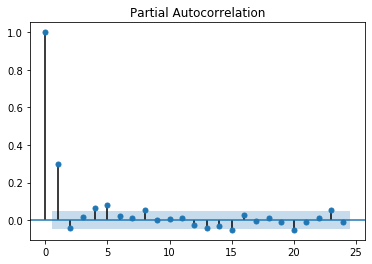

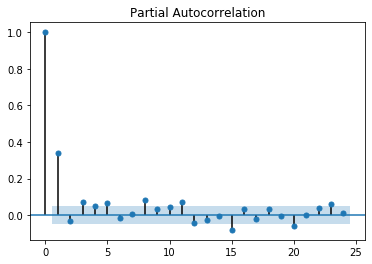

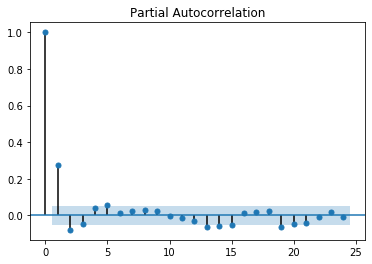

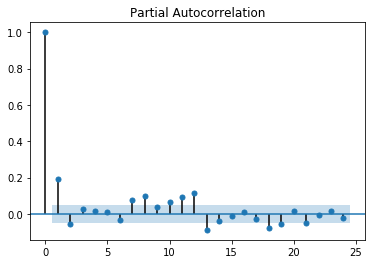

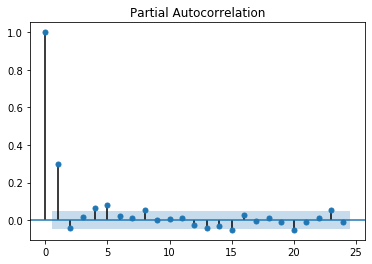

In [409]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(df1.bond_returns[1:], lags= 24)
plot_pacf(df1['S&P500_returns'][1:], lags= 24)
plot_pacf(df1.Gold_returns[1:], lags= 24)
plot_pacf(rets_99.optimal_pf_rets[1:], lags= 24)

## This plot suggests that most of the varainace of current period return can be explained by first two lags and the remaining lags have a fading affect on the value of current period, So its better to use autoregressive model with two lags to predict the next periods return.

In [410]:
rets_99

,Year,Month,S&P500_returns,Gold_returns,bond_returns,optimal_pf_rets
0,1871,1,NaN,NaN,NaN,NaN
1,1871,2,-0.011806,-0.023076,-0.025605,-0.021136
2,1871,3,0.014264,0.001081,-0.010462,-0.002761
3,1871,4,0.072055,0.046755,0.042245,0.051943
4,1871,5,0.053808,0.017931,0.027506,0.036657
...,...,...,...,...,...,...
1543,1999,8,-0.040043,0.000488,-0.008743,-0.019538
1544,1999,9,-0.010712,0.024402,0.001648,-0.003455
1545,1999,10,-0.014485,0.175953,-0.010896,-0.020295
1546,1999,11,0.070424,-0.058045,0.010434,0.033355


In [411]:
ls = []
for index, row in df.loc[12:].iterrows():
    a = df['S&P500'][index-12]
    b = df['S&P500'][index-3]
    c = a/b -1
    ls.append(c)

In [412]:
zeros = ['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN']
ret_10mths = zeros + ls

In [413]:
df['t-12_to_t-3_sp'] = ret_10mths

In [414]:
df

,Year,Month,CPI,S&P500,Earnings,Dividends,10Y treasury,Gold,CPI_lag,S&P500_infl_adj,S&P500_returns,Gold_adj_infl,Gold_returns,yield_lag,c/r,c/r+,bond_price,infl,bond_returns,t-12_to_t-3_sp
0,1871,1,12.464,4.440000,0.0333,0.0217,0.053200,20.63,12.845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871,2,12.845,4.500000,0.0333,0.0217,0.053233,20.77,13.035,4.575722,-0.011806,21.260619,-0.023076,0.053200,0.999380,0.004800,1.004180,1.030568,-0.025605,NaN
2,1871,3,13.035,4.610000,0.0333,0.0217,0.053267,21.10,12.559,4.566563,0.014264,21.077225,0.001081,0.053233,0.999362,0.004813,1.004175,1.014792,-0.010462,NaN
3,1871,4,12.559,4.740000,0.0333,0.0217,0.053300,21.28,12.274,4.441656,0.072055,20.329490,0.046755,0.053267,0.999381,0.004805,1.004186,0.963483,0.042245,NaN
4,1871,5,12.274,4.860000,0.0333,0.0217,0.053333,21.17,12.083,4.632436,0.053808,20.797095,0.017931,0.053300,0.999381,0.004807,1.004188,0.977307,0.027506,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2020,10,260.388,3418.701364,7.9173,4.8883,0.007900,1902.53,260.229,3366.913147,0.016833,1924.278124,-0.011302,0.006800,0.860759,0.129250,0.990010,1.000415,-0.010401,-0.071685
1798,2020,11,260.229,3548.992500,7.7694,4.8724,0.008700,1869.50,260.474,3416.613812,0.040172,1901.368263,-0.016761,0.007900,0.908046,0.084966,0.993012,0.999389,-0.006381,-0.084561
1799,2020,12,260.474,3695.310000,7.5617,4.8566,0.009300,1853.80,261.582,3552.333800,0.041616,1871.260094,-0.009331,0.008700,0.935484,0.059524,0.995008,1.000941,-0.005928,-0.056089
1800,2021,1,261.582,3793.748421,7.3594,4.8408,0.010800,1869.68,262.136,3711.029049,0.023595,1861.685664,0.004294,0.009300,0.861111,0.125482,0.986593,1.004254,-0.017586,-0.041097


In [415]:
lg = []
for index, row in df.loc[12:].iterrows():
    a = df['Gold'][index-12]
    b = df['Gold'][index-3]
    c = a/b -1
    lg.append(c)

In [416]:
ret_10_g = zeros + lg

In [417]:
df['t-12_to_t-3_gold'] = ret_10_g

In [418]:
lb = []
for index, row in df.loc[13:].iterrows():
    a = df['bond_price'][index-12]
    b = df['bond_price'][index-3]
    c = a/b -1
    lb.append(c)

In [419]:
zeros1 = ['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN']
ret_10m_b = zeros1 + lb

In [420]:
df['t-12_to_t-3_bonds'] = ret_10m_b

In [421]:
df['S&P500_returns_t-1'] = df['S&P500_returns'].shift(1)

In [422]:
df['Gold_returns_t-1'] = df['Gold_returns'].shift(1)
df['bond_returns_t-1'] = df['bond_returns'].shift(1)
df['S&P500_returns_t-2'] = df['S&P500_returns'].shift(2)
df['Gold_returns_t-2'] = df['Gold_returns'].shift(2)
df['bond_returns_t-2'] = df['bond_returns'].shift(2)


In [423]:
df

,Year,Month,CPI,S&P500,Earnings,Dividends,10Y treasury,Gold,CPI_lag,S&P500_infl_adj,...,bond_returns,t-12_to_t-3_sp,t-12_to_t-3_gold,t-12_to_t-3_bonds,S&P500_returns_t-1,Gold_returns_t-1,bond_returns_t-1,S&P500_returns_t-2,Gold_returns_t-2,bond_returns_t-2
0,1871,1,12.464,4.440000,0.0333,0.0217,0.053200,20.63,12.845,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1871,2,12.845,4.500000,0.0333,0.0217,0.053233,20.77,13.035,4.575722,...,-0.025605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1871,3,13.035,4.610000,0.0333,0.0217,0.053267,21.10,12.559,4.566563,...,-0.010462,NaN,NaN,NaN,-0.011806,-0.023076,-0.025605,NaN,NaN,NaN
3,1871,4,12.559,4.740000,0.0333,0.0217,0.053300,21.28,12.274,4.441656,...,0.042245,NaN,NaN,NaN,0.014264,0.001081,-0.010462,-0.011806,-0.023076,-0.025605
4,1871,5,12.274,4.860000,0.0333,0.0217,0.053333,21.17,12.083,4.632436,...,0.027506,NaN,NaN,NaN,0.072055,0.046755,0.042245,0.014264,0.001081,-0.010462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2020,10,260.388,3418.701364,7.9173,4.8883,0.007900,1902.53,260.229,3366.913147,...,-0.010401,-0.071685,-0.187803,-0.010637,-0.007659,-0.025551,-0.003741,0.055599,0.067451,-0.005519
1798,2020,11,260.229,3548.992500,7.7694,4.8724,0.008700,1869.50,260.474,3416.613812,...,-0.006381,-0.084561,-0.253276,-0.005314,0.016833,-0.011302,-0.010401,-0.007659,-0.025551,-0.003741
1799,2020,12,260.474,3695.310000,7.5617,4.8566,0.009300,1853.80,261.582,3552.333800,...,-0.005928,-0.056089,-0.230546,-0.000683,0.040172,-0.016761,-0.006381,0.016833,-0.011302,-0.010401
1800,2021,1,261.582,3793.748421,7.3594,4.8408,0.010800,1869.68,262.136,3711.029049,...,-0.017586,-0.041097,-0.179687,0.020881,0.041616,-0.009331,-0.005928,0.040172,-0.016761,-0.006381


In [424]:
df2 = df.loc[mask1]

In [425]:
df2 = df2.loc[13:]

In [426]:
df2 = df2.apply(pd.to_numeric)

## Q6.

In [427]:
import statsmodels.api as sm
Y = df2['S&P500_returns']
X = df2[['S&P500_returns_t-1','S&P500_returns_t-2','t-12_to_t-3_sp']]
model = sm.GLM(Y,X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         S&P500_returns   No. Observations:                 1535
Model:                            GLM   Df Residuals:                     1532
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                       0.0016167
Method:                          IRLS   Log-Likelihood:                 2756.4
Date:                Wed, 31 Mar 2021   Deviance:                       2.4768
Time:                        15:34:12   Pearson chi2:                     2.48
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
S&P500_returns_t-1     0.3103      0.026     12.167      0.000       0.260       0.360
S&P500_returns_t-2    -0.0628      0.026     -2.454      0.014      -0.113      -0.013
t-12_to_t-3_sp        -0.0014      0.006     -0.229      0.819      -0.013       0.010
======================================================================================
"""

In [428]:
Y1 = df2['bond_returns']
X1 = df2[['bond_returns_t-1','bond_returns_t-2','t-12_to_t-3_bonds']]
model1 = sm.GLM(Y1,X1)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           bond_returns   No. Observations:                 1535
Model:                            GLM   Df Residuals:                     1532
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      0.00022875
Method:                          IRLS   Log-Likelihood:                 4257.3
Date:                Wed, 31 Mar 2021   Deviance:                      0.35044
Time:                        15:34:13   Pearson chi2:                    0.350
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
bond_returns_t-1      0.3662      0.026     14.209      0.000       0.316       0.417
bond_returns_t-2     -0.0281      0.026     -1.080      0.280      -0.079       0.023
t-12_to_t-3_bonds    -0.0498      0.026     -1.921      0.055      -0.101       0.001
=====================================================================================
"""

In [429]:
Y2 = df2['Gold_returns']
X2 = df2[['Gold_returns_t-1','Gold_returns_t-2','t-12_to_t-3_gold']]
model2 = sm.GLM(Y2,X2)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Gold_returns   No. Observations:                 1535
Model:                            GLM   Df Residuals:                     1532
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                       0.0011100
Method:                          IRLS   Log-Likelihood:                 3045.1
Date:                Wed, 31 Mar 2021   Deviance:                       1.7005
Time:                        15:34:13   Pearson chi2:                     1.70
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Gold_returns_t-1     0.1969      0.025      7.752      0.000       0.147       0.247
Gold_returns_t-2    -0.0700      0.025     -2.744      0.006      -0.120      -0.020
t-12_to_t-3_gold    -0.0404      0.009     -4.662      0.000      -0.057      -0.023
====================================================================================
"""

## Q7

In [430]:
mask2 = (df.Year >= 2000)

In [431]:
df3 = df.loc[mask2]

In [432]:
df3 = df3.apply(pd.to_numeric)

In [433]:
X01 = df3[['S&P500_returns_t-1','S&P500_returns_t-2','t-12_to_t-3_sp']]
X11 = df3[['bond_returns_t-1','bond_returns_t-2','t-12_to_t-3_bonds']]
X21 = df3[['Gold_returns_t-1','Gold_returns_t-2','t-12_to_t-3_gold']]

In [434]:
df3['predicted_sp'] = res.predict(X01)

In [435]:
df3['predicted_bond'] = res1.predict(X11)

In [437]:
df3['predicted_gold'] = res2.predict(X21)

In [438]:
df4 = df3[['Year','Month','predicted_sp','predicted_gold','predicted_bond']]
df4

,Year,Month,predicted_sp,predicted_gold,predicted_bond
1548,2000,1,0.004348,0.000559,-0.005551
1549,2000,2,-0.002906,0.003212,-0.007387
1550,2000,3,-0.009068,0.009667,0.004282
1551,2000,4,0.011597,-0.014078,0.004097
1552,2000,5,0.002352,0.002308,0.010495
...,...,...,...,...,...
1797,2020,10,-0.005769,-0.002159,-0.000685
1798,2020,11,0.005822,0.009799,-0.003439
1799,2020,12,0.011486,0.006809,-0.002010
1800,2021,1,0.010448,0.006598,-0.003031


## Computing new prtfolio weights each month and then multiplying with the actual returns returns to get the performance

In [439]:
x = []
z = []
for index, rows in df4.iterrows():
    c = rows['predicted_sp']
    d = rows['predicted_gold']
    e = rows['predicted_bond']
    f = np.array([c,d,e])
    g = f.dot(np.linalg.inv(cov))
    g = g/sum(g)
    h = df['S&P500_returns'][index]
    i = df['Gold_returns'][index]
    j = df['bond_returns'][index]
    k = np.array([h,i,j])
    l = g.dot(k)
    x.append(l)
    z.append(g)

In [440]:
df4['optimal_portfolio_rets'] = x

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [441]:
df4.optimal_portfolio_rets.mean()/df4.optimal_portfolio_rets.std()

0.01746243480271769

## We can see that the Sharpe is very low and the performance is not that great based on optimal porfolio using the predicted values. 

## Q8

In [254]:
df['Earnings_Infl_adj'] = df['Earnings'] * df['infl']

In [255]:
ey = []
for index, rows in df.loc[12:].iterrows():
    currentrow = rows['Earnings']
    ei = []
    for i in range(index-12, index-1):
        i = df['Earnings_Infl_adj'][i]
        ei.append(i)
    val1 = currentrow/sum(ei)     
    ey.append(val1)

In [256]:
len(ey)


1790

In [257]:
val_measure_1 = zeros + ey 

In [258]:
df['Val_measure_1'] = val_measure_1

In [259]:
by = []
for index, row in df.loc[12:].iterrows():
    currentrow = row['10Y treasury']
    inf1 = df['CPI'][index-1]
    infl2 = df['CPI'][index-12]
    infl = (inf1/infl2) - 1
    x = currentrow - infl
    by.append(x)

In [260]:
val_measure_2 = zeros + by

In [261]:
df['Val_measure_2'] = val_measure_2

In [262]:
gy = []
for index, row in df.loc[12:].iterrows():
    currentrow = row['Gold']
    gi = []
    for i in range(index-12, index-1):
        i = df['Gold'][i]
        gi.append(i)
    val2 = sum(gi)/len(gi)
    val2_ = currentrow/val2
    gy.append(val2_)

In [263]:
val_measure_3 = zeros + gy

In [264]:
df['Val_measure_3'] = val_measure_3

In [265]:
df88 = df.loc[13:]

In [266]:
df88

,Year,Month,CPI,S&P500,Earnings,Dividends,10Y treasury,Gold,CPI_lag,S&P500_infl_adj,...,S&P500_returns_t-1,Gold_returns_t-1,bond_returns_t-1,S&P500_returns_t-2,Gold_returns_t-2,bond_returns_t-2,Earnings_Infl_adj,Val_measure_1,Val_measure_2,Val_measure_3
13,1872,2,12.654,4.880000,0.0338,0.0222,0.053783,20.80,12.845,4.860000,...,0.029937,0.015511,0.004211,0.003115,-0.034688,-0.018417,0.033800,0.092127,0.068653,0.997211
14,1872,3,12.845,5.040000,0.0340,0.0225,0.053967,20.63,13.130,4.953659,...,0.008683,-0.007160,0.003065,0.029937,0.015511,0.004211,0.034513,0.092879,0.083196,0.988285
15,1872,4,13.130,5.180000,0.0342,0.0228,0.054150,20.68,13.130,5.151826,...,0.021972,-0.022921,-0.011841,0.008683,-0.007160,0.003065,0.034959,0.093424,0.031377,0.991976
16,1872,5,13.130,5.180000,0.0344,0.0231,0.054333,20.63,13.035,5.180000,...,0.009894,-0.019335,-0.018675,0.021972,-0.022921,-0.011841,0.034400,0.093351,-0.015408,0.992391
17,1872,6,13.035,5.130000,0.0346,0.0233,0.054517,20.63,12.845,5.142521,...,0.004459,-0.002418,0.003115,0.009894,-0.019335,-0.018675,0.034350,0.093282,-0.032134,0.994522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,2020,10,260.388,3418.701364,7.9173,4.8883,0.007900,1902.53,260.229,3366.913147,...,-0.007659,-0.025551,-0.003741,0.055599,0.067451,-0.005519,7.920585,0.073083,-0.003501,1.153453
1798,2020,11,260.229,3548.992500,7.7694,4.8724,0.008700,1869.50,260.474,3416.613812,...,0.016833,-0.011302,-0.010401,-0.007659,-0.025551,-0.003741,7.764656,0.073821,-0.003664,1.107284
1799,2020,12,260.474,3695.310000,7.5617,4.8566,0.009300,1853.80,261.582,3552.333800,...,0.040172,-0.016761,-0.006381,0.016833,-0.011302,-0.010401,7.568819,0.074329,-0.003367,1.073104
1800,2021,1,261.582,3793.748421,7.3594,4.8408,0.010800,1869.68,262.136,3711.029049,...,0.041616,-0.009331,-0.005928,0.040172,-0.016761,-0.006381,7.390705,0.075184,0.001097,1.06056


In [267]:
mask0 = (df88.Year <= 1999)
df88 = df88.loc[mask]

In [268]:
df88 = df88.apply(pd.to_numeric)

In [269]:
X8 = df88[['Val_measure_1', 'Val_measure_2','Val_measure_3']]
Y81 = df88['S&P500_returns']
model81 = sm.GLM(Y81, X8)
res81 = model81.fit()
res81.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         S&P500_returns   No. Observations:                 1535
Model:                            GLM   Df Residuals:                     1532
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                       0.0017075
Method:                          IRLS   Log-Likelihood:                 2714.5
Date:                Wed, 31 Mar 2021   Deviance:                       2.6158
Time:                        12:57:41   Pearson chi2:                     2.62
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Val_measure_1     0.0879      0.076      1.157      0.247      -0.061       0.237
Val_measure_2     0.0804      0.018      4.367      0.000       0.044       0.117
Val_measure_3    -0.0035      0.007     -0.491      0.623      -0.017       0.010
=================================================================================
"""

In [270]:
Y82 = df88['bond_returns']
model82 = sm.GLM(Y82, X8)
res82 = model82.fit()
res82.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           bond_returns   No. Observations:                 1535
Model:                            GLM   Df Residuals:                     1532
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                      0.00024607
Method:                          IRLS   Log-Likelihood:                 4201.3
Date:                Wed, 31 Mar 2021   Deviance:                      0.37698
Time:                        12:57:42   Pearson chi2:                    0.377
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Val_measure_1     0.0193      0.029      0.669      0.503      -0.037       0.076
Val_measure_2     0.0595      0.007      8.506      0.000       0.046       0.073
Val_measure_3    -0.0013      0.003     -0.469      0.639      -0.007       0.004
=================================================================================
"""

In [271]:
Y83 = df88['Gold_returns']
model83 = sm.GLM(Y83, X8)
res83 = model83.fit()
res83.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Gold_returns   No. Observations:                 1535
Model:                            GLM   Df Residuals:                     1532
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                       0.0010471
Method:                          IRLS   Log-Likelihood:                 3089.8
Date:                Wed, 31 Mar 2021   Deviance:                       1.6042
Time:                        12:57:42   Pearson chi2:                     1.60
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Val_measure_1    -0.7912      0.059    -13.309      0.000      -0.908      -0.675
Val_measure_2    -0.0050      0.014     -0.345      0.730      -0.033       0.023
Val_measure_3     0.0742      0.006     13.409      0.000       0.063       0.085
=================================================================================
"""

In [272]:
mask8 = (df.Year > 1999)
df881 = df.loc[mask8]

In [273]:
df881 = df881.apply(pd.to_numeric)

In [274]:
X881 = df881[['Val_measure_1', 'Val_measure_2','Val_measure_3']]
predicted_sp500_rets = res81.predict(X881)
predicted_bond_rets = res82.predict(X881)
predicted_gold_rets = res83.predict(X881)

In [275]:
df882 = pd.DataFrame(list(zip(predicted_sp500_rets, predicted_bond_rets, predicted_gold_rets)))

In [276]:
df882 = df882* 100

In [277]:
cov1 = df882.cov()

In [278]:
means8 = np.array(df882.mean())

In [279]:
sharpe_weights_8 = means8.dot(np.linalg.inv(cov1))

In [280]:
sharpe_weights_8 = sharpe_weights_8/sum(sharpe_weights_8)

In [281]:
sharpe_weights_8

array([-5.50977328,  6.95017489, -0.44040161])

In [283]:
df882['pf_rets'] = -5.50977328*df882[0] +  6.95017489*df882[1] + -0.44040161*df882[2]

In [284]:
df882

,0,1,2,pf_rets
0,0.929140,0.329763,-0.937749,-2.414455
1,0.879679,0.302585,-0.465857,-2.538646
2,0.847649,0.274827,-0.790978,-2.411912
3,0.811247,0.252839,-0.853583,-2.336590
4,0.832849,0.274777,-0.845185,-2.306838
...,...,...,...,...
249,0.213581,-0.025163,2.782135,-2.576927
250,0.234789,-0.018891,2.381063,-2.473554
251,0.253505,-0.011841,2.087001,-2.398170
252,0.301272,0.017931,1.924025,-2.382657


In [285]:
df882.pf_rets.mean()/df882.pf_rets.std()

-10.853335594955889

## The results from this model are not that convincing and not accurate and we have sharpe of -10 which is really worse